# Unsupervised Learning (K-Means Clustering)

Er moet bepaald worden hoe verkoopafdelingen (sales_branches) geclusterd kunnen worden. 

In [19]:
# Imports
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
# Load Dataset
sales_conn = sqlite3.connect("../data/go_sales_volledig.sqlite")

# We importeren de daadwerkelijke return-reden niet, omdat we alleen de ID nodig hebben tijdens het trainen.
branches = pd.read_sql_query(
    "SELECT * FROM sales_branch ",
    sales_conn,
)
branches.dtypes

SALES_BRANCH_CODE     int64
ADDRESS1             object
ADDRESS2             object
CITY                 object
REGION               object
COUNTRY_CODE          int64
dtype: object

In [21]:
# Data Preprocessing

branches_cleaned = branches.drop(
    columns=["SALES_BRANCH_CODE", "ADDRESS1", "ADDRESS2", "CITY"]
)

branches_encoded = pd.get_dummies(
    branches_cleaned, columns=["REGION", "COUNTRY_CODE"], drop_first=True
)
branches_encoded.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(branches_encoded)

In [22]:
# Train Model

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


/Users/stanrunge/dev/deds/venv/lib/python3.12/site-packages/sklearn/base.py:1363: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


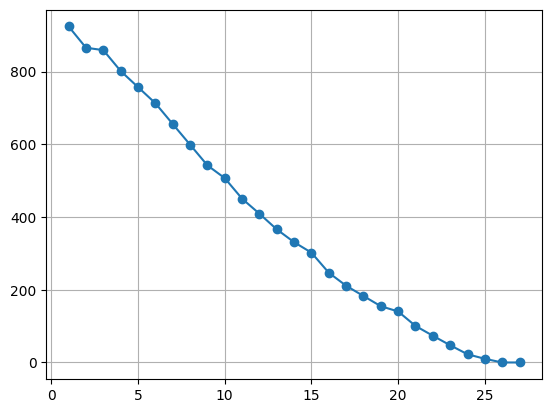

In [26]:
# Evaluate Model
inertias = []
ks = range(1, 28)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker="o")
plt.grid(True)
plt.show()